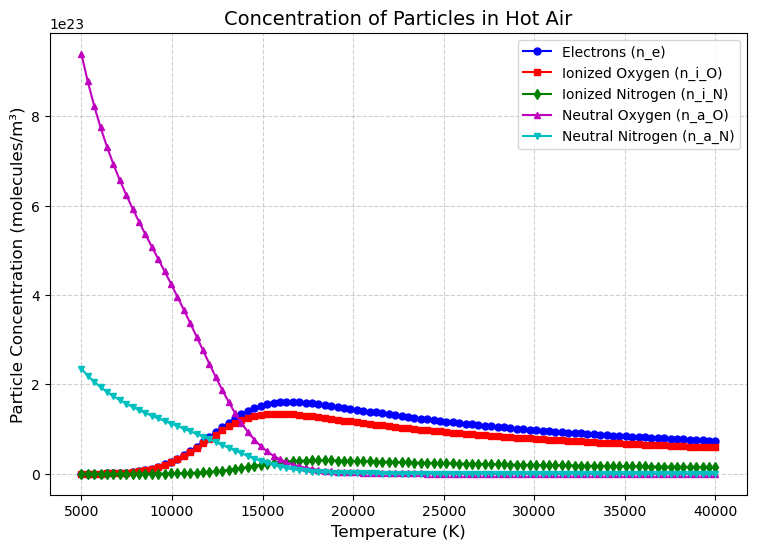

In [6]:
# %% [code]
import numpy as np
from sympy import nsolve
from sympy.abc import x, y, z, u, v
from matplotlib import pyplot as plt

# 📌 **Constants for Oxygen and Nitrogen**
gi_O, gi_N = 4, 9   # Statistical weights for ionized Oxygen/Nitrogen
ga_O, ga_N = 9, 4   # Statistical weights for neutral Oxygen/Nitrogen
ge = 2              # Statistical weight for electrons
m = 9.1093837e-31   # Electron mass (kg)
h_ = 1.0545718e-34  # Reduced Planck's constant (J·s)
k = 1.380649e-23    # Boltzmann constant (J/K)
J_O = 12.067 * 1.60218e-19  # Ionization energy for Oxygen (J)
J_N = 15.58 * 1.60218e-19   # Ionization energy for Nitrogen (J)
P_atm = 101325      # Atmospheric pressure in Pascals
p = 0.8             # Pressure fraction in atm
R = 8.314           # Gas constant (J/(mol·K))
Na = 6.024 * 10**23 # Avogadro's number

# 🌡 **Temperature range (K)**
Temp = np.linspace(40000, 5000, 100)

# 📌 **Saha functions for Oxygen and Nitrogen**
def f1(T):
    """ Computes Saha equilibrium factor for Oxygen """
    return (gi_O * ge / ga_O) * (m * k * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J_O / (k * T)) / Na

def f2(T):
    """ Computes Saha equilibrium factor for Nitrogen """
    return (gi_N * ge / ga_N) * (m * k * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J_N / (k * T)) / Na

# 📌 **Ionization degree function**
def alpha(T, P, n):
    """ Computes the ionization degree α = n_e / (n_e + n_i_O + n_i_N) """
    return n[0] / (n[0] + n[3] + n[4])

# 🔢 **Initial guess for densities**: [n_e, n_a_O, n_a_N, n_i_O, n_i_N]
n = [0., 0., 0., 1., 1.]
dat = [[] for _ in n]  # Storage for concentrations

# 🔄 **Solve numerically for each temperature**
for i in range(len(n)):
    for T in Temp:
        # Solve the system of equations numerically
        n = nsolve([
            x * y - u * f1(T),            # Saha equation for Oxygen
            x * z - v * f2(T),            # Saha equation for Nitrogen
            (p * P_atm) / (T * R) - x - y - z - u - v,  # Equation of state
            x - y - z,                    # Electron charge neutrality
            y + u - 4 * z - 4 * v         # Ion charge conservation
        ], [x, y, z, u, v], n)
        
        # Store concentration (scaled by Avogadro's number)
        dat[i].append(n[i] * Na)

# 📌 **Species Labels for Legend**
species_labels = [
    'Electrons (n_e)', 'Ionized Oxygen (n_i_O)', 'Ionized Nitrogen (n_i_N)',
    'Neutral Oxygen (n_a_O)', 'Neutral Nitrogen (n_a_N)'
]

# 🎨 **Define Colors & Markers for Better Visibility**
colors = ['b', 'r', 'g', 'm', 'c']  # Blue, Red, Green, Magenta, Cyan
markers = ['o', 's', 'd', '^', 'v']  # Circle, Square, Diamond, Triangle-Up, Triangle-Down

# 📊 **Plot the Results**
plt.figure(figsize=(9, 6))
for i in range(len(n)):
    plt.plot(Temp, dat[i], linestyle='-', marker=markers[i], markersize=5, color=colors[i], linewidth=1.5,
             label=species_labels[i])

# 📌 **Labels and Title**
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Particle Concentration (molecules/m³)', fontsize=12)
plt.title("Concentration of Particles in Hot Air", fontsize=14)

# 📌 **Grid and Legend**
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# 📌 **Show the Plot**
plt.show()



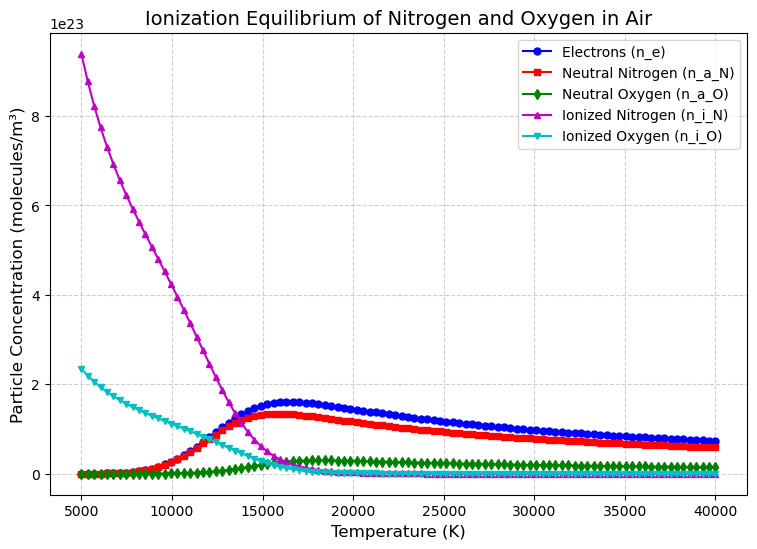

In [7]:
# %% [code]
# 📚 Libraries
import numpy as np
from scipy.optimize import root
from matplotlib import pyplot as plt

# 📌 **Constants for Nitrogen and Oxygen**
gi_N, gi_O = 4, 9   # Statistical weights for ionized Nitrogen/Oxygen
ga_N, ga_O = 9, 4   # Statistical weights for neutral Nitrogen/Oxygen
ge = 2              # Statistical weight for electrons
m = 9.1093837e-31   # Electron mass (kg)
h_ = 1.0545718e-34  # Reduced Planck's constant (J·s)
k = 1.380649e-23    # Boltzmann constant (J/K)
J_N = 12.067 * 1.60218e-19  # Ionization energy for Nitrogen (J)
J_O = 15.58 * 1.60218e-19   # Ionization energy for Oxygen (J)
P_atm = 101325      # Atmospheric pressure in Pascals
p = 0.8             # Pressure fraction in atm
R = 8.314           # Universal gas constant (J/(mol·K))
Na = 6.02214076e23  # Avogadro's number (corrected)

# 🌡 **Temperature range (K)**
Temp = np.linspace(40000, 5000, 100)

# 📌 **Fixed Saha functions for Nitrogen and Oxygen**
def f1(T):
    """ Computes Saha equilibrium factor for Nitrogen """
    return (gi_N * ge / ga_N) * (m * k * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J_N / (k * T)) / Na

def f2(T):
    """ Computes Saha equilibrium factor for Oxygen """
    return (gi_O * ge / ga_O) * (m * k * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J_O / (k * T)) / Na

# 🔢 **Initial guess for densities**: [n_e, n_a_N, n_a_O, n_i_N, n_i_O]
n = [1e-10, 1e-10, 1e-10, 1e-10, 1e-10]
dat = [[] for _ in range(len(n))]  # Storage for densities

# 📌 **System of equations for plasma equilibrium**
def equations(vars, T):
    """ Defines the system of equations for ionization equilibrium """
    x, y, z, u, v = vars
    eq1 = x * y - u * f1(T)  # Saha equation for Nitrogen
    eq2 = x * z - v * f2(T)  # Saha equation for Oxygen
    eq3 = (p * P_atm) / (T * R) - x - y - z - u - v  # Equation of state
    eq4 = x - y - z  # Electron charge neutrality
    eq5 = y + u - 4 * z - 4 * v  # Charge balance
    return [eq1, eq2, eq3, eq4, eq5]

# 🔄 **Solve numerically for each temperature**
for T in Temp:
    sol = root(equations, n, args=(T,))
    if sol.success:
        n = sol.x  # Update guess for next iteration
        for i in range(len(n)):
            dat[i].append(n[i] * Na)  # Convert to molecules/m³
    else:
        print(f"⚠️ Warning: Solution did not converge at T = {T} K")

# 📌 **Labels for species**
species_labels = [
    'Electrons (n_e)', 'Neutral Nitrogen (n_a_N)', 'Neutral Oxygen (n_a_O)',
    'Ionized Nitrogen (n_i_N)', 'Ionized Oxygen (n_i_O)'
]

# 🎨 **Colors & Markers for Better Visibility**
colors = ['b', 'r', 'g', 'm', 'c']  # Blue, Red, Green, Magenta, Cyan
markers = ['o', 's', 'd', '^', 'v']  # Circle, Square, Diamond, Triangle-Up, Triangle-Down

# 📊 **Plot the Results**
plt.figure(figsize=(9, 6))
for i in range(len(n)):
    plt.plot(Temp, dat[i], linestyle='-', marker=markers[i], markersize=5, color=colors[i], linewidth=1.5,
             label=species_labels[i])

# 📌 **Labels and Title**
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Particle Concentration (molecules/m³)', fontsize=12)
plt.title("Ionization Equilibrium of Nitrogen and Oxygen in Air", fontsize=14)

# 📌 **Grid and Legend**
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# 📌 **Show the Plot**
plt.show()
